# AutoAIで生成したモデルのテスト

In [1]:
# wml_credentialsの設定

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
# scoring URLの設定
scoring_url = "https://us-south.ml.cloud.ibm.com/v4/deployments/07e86931-e8cf-4c31-b2f4-792c4dc56eb1/predictions"

In [4]:
%matplotlib inline
import urllib3, requests, json
import urllib.request
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

In [ ]:
# トークン取得
apikey = wml_credentials["apikey"]

# Get an IAM token from IBM Cloud
url     = "https://iam.bluemix.net/oidc/token"
headers = { "Content-Type" : "application/x-www-form-urlencoded" }
data    = "apikey=" + apikey + "&grant_type=urn:ibm:params:oauth:grant-type:apikey"
IBM_cloud_IAM_uid = "bx"
IBM_cloud_IAM_pwd = "bx"
response  = requests.post( url, headers=headers, data=data, 
        auth=( IBM_cloud_IAM_uid, IBM_cloud_IAM_pwd ) )
iam_token = response.json()["access_token"]

print('iam_token = ', iam_token)

In [6]:
# Header の組立て
header_token = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + iam_token}
ml_instance_id = wml_credentials["instance_id"]
header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + iam_token, 'ML-Instance-ID': ml_instance_id}

In [7]:
# The code was removed by Watson Studio for sharing.

,DATE,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,Wed Mar 08 00:00:00 UTC 2017,85281,32.7,2.7,6.2,21.1,11.0,14.2,4771252.43,100126.56,30,13,0,65,2,91
1,Thu Mar 09 00:00:00 UTC 2017,85573,41.9,6.5,9.0,29.5,11.8,21.7,4769423.10,99787.45,21,22,7,54,2,91
2,Fri Mar 10 00:00:00 UTC 2017,86730,30.0,6.5,5.6,17.8,11.0,19.9,4807670.28,105127.16,32,15,6,30,2,91
3,Sat Mar 11 00:00:00 UTC 2017,96306,30.2,7.6,11.2,12.9,15.1,17.3,5081779.16,124681.71,40,15,7,15,2,91
4,Sun Mar 12 00:00:00 UTC 2017,103809,50.6,7.5,18.8,28.9,16.9,27.8,4926851.40,116052.82,44,15,9,39,2,92


In [8]:
# 正解値の取得
Yt = df['Y']
print(Yt[:5])

0     85281
1     85573
2     86730
3     96306
4    103809
Name: Y, dtype: int64


In [9]:
df1 = df.drop(['Y'], axis=1)
display(df1.head())

,DATE,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,Wed Mar 08 00:00:00 UTC 2017,32.7,2.7,6.2,21.1,11.0,14.2,4771252.43,100126.56,30,13,0,65,2,91
1,Thu Mar 09 00:00:00 UTC 2017,41.9,6.5,9.0,29.5,11.8,21.7,4769423.10,99787.45,21,22,7,54,2,91
2,Fri Mar 10 00:00:00 UTC 2017,30.0,6.5,5.6,17.8,11.0,19.9,4807670.28,105127.16,32,15,6,30,2,91
3,Sat Mar 11 00:00:00 UTC 2017,30.2,7.6,11.2,12.9,15.1,17.3,5081779.16,124681.71,40,15,7,15,2,91
4,Sun Mar 12 00:00:00 UTC 2017,50.6,7.5,18.8,28.9,16.9,27.8,4926851.40,116052.82,44,15,9,39,2,92


In [10]:
# DataFrameから項目名Listの生成
fields = df1.columns.tolist()
print(fields)

['DATE', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14']


In [11]:
# DataFrameから入力用Listの生成
values = df1.values.tolist()
# テスト用
#values = df1.head(2).values.tolist()
print(values[:2])

[['Wed Mar 08 00:00:00 UTC 2017', 32.7, 2.7, 6.199999999999998, 21.1, 11.0, 14.2, 4771252.43, 100126.56, 30, 13, 0, 65, 2, 91], ['Thu Mar 09 00:00:00 UTC 2017', 41.90000000000001, 6.5, 9.0, 29.5, 11.8, 21.7, 4769423.1, 99787.45, 21, 22, 7, 54, 2, 91]]


In [12]:
# payload変数の組立て
payload_scoring = {"input_data": [{
    "fields": fields, 
    "values": values
}]}

In [13]:
# APIの呼出し
response_scoring = requests.post(scoring_url,  json=payload_scoring, headers=header)

In [14]:
# 戻り値のparse
res = json.loads(response_scoring.text)

pred = res['predictions'][0]
pred_values = pred['values']
pred_values0 = [v[0][0] for v in pred_values]
pred_fields = pred['fields']
df_res = pd.DataFrame(pred_values0, columns = pred_fields)

In [15]:
display(df_res.head())

,prediction
0,84624.406250
1,89949.171875
2,88986.390625
3,94686.203125
4,95471.203125


In [16]:
df_res['Yt'] = Yt

In [17]:
display(df_res.head())

,prediction,Yt
0,84624.406250,85281
1,89949.171875,85573
2,88986.390625,86730
3,94686.203125,96306
4,95471.203125,103809


In [18]:
yr = [Yt.min(), Yt.max()]
print(yr)

[83500, 136697]


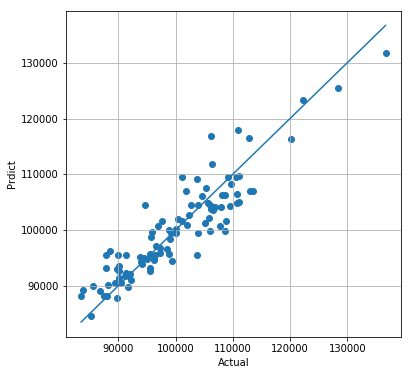

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(df_res['Yt'], df_res['prediction'])
plt.xlabel('Actual')
plt.ylabel('Prdict')
plt.plot(yr, yr)
plt.grid()
plt.show()